In [7]:
import dwave_qbsolv as qbs
import qdk
import oneqloud_polynomials
from qdk.binary_polynomial import QuadraticBinaryPolynomialBuilder
from qdk.common_solver_interface import Tabu1OptSolver
# 
# Create a quadratic polynomial x_0 - 2 * x_1 + 0.5 x_1 * x_3
builder = QuadraticBinaryPolynomialBuilder()
builder.add_term(1.0, 0, 0)
builder.add_term(-2.0, 1, 1)
builder.add_term(0.5, 1, 3)

In [8]:
# # Build a quadratic polynomial
quad_poly = builder.build_polynomial()
# 
# # Create solver
tabu_solver = Tabu1OptSolver()
# 
# # Run the solver
binary_solution_list = tabu_solver.minimize(quad_poly)
# 
# # Get best solution
print('minimum energy: ',\
    binary_solution_list.peek_minimum_energy_solution().energy)

In [9]:
# quadratic unconstrained binary optimization
import dimod
bqm = dimod.BinaryQuadraticModel({0: -1, 1: -1}, {(0, 1): 2}, 0.0, dimod.BINARY)  # QUBO
bqm_ising = bqm.change_vartype(dimod.SPIN, inplace=False)  # Ising

In [10]:
h = {0: 0.0, 1: 0.0}
J = {(0, 1): -1.0}
bqm = dimod.BinaryQuadraticModel.from_ising(h, J)
response = dimod.ExactSolver().sample(bqm)
response.samples_matrix

AttributeError: 'SampleSet' object has no attribute 'samples_matrix'

In [11]:
import dwave_qbsolv as qbs

In [12]:
# builder.add_term(1.0, 0, 0)
# builder.add_term(-2.0, 1, 1)
# builder.add_term(0.5, 1, 3)
bqm = dimod.BinaryQuadraticModel({0: -1, 1: -1}, {(0, 1): 2}, 0.0, dimod.BINARY)  # QUBO
# 4 required positional arguments: 'linear', 'quadratic', 'offset' and 'vartype'
bqm = dimod.BinaryQuadraticModel()

TypeError: __init__() missing 4 required positional arguments: 'linear', 'quadratic', 'offset' and 'vartype'

In [13]:
from wildcat.util.matrix import random_symmetric_matrix
from wildcat.solver.ising_hamiltonian_solver import IsingHamiltonianSolver

     
Jij = random_symmetric_matrix(size=40)
solver = IsingHamiltonianSolver(ising_interactions=Jij)

def callback(arrangement):
    e = solver.hamiltonian_energy(arrangement)
    print("Energy: ", e)
    print("Spins: ", arrangement)

solver.solve(callback)


`background_callback` is deprecated and will be removed in 1.0, use `hooks` instead


<Future at 0x11e5ec290 state=running>

In [14]:
from wildcat.network.local_endpoint import LocalEndpoint
     
solver.solve(callback, endpoint=LocalEndpoint())

Energy:  -137.77164435586664
Spins:  [-1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1]


<Future at 0x11e638b50 state=finished returned ndarray>

In [15]:
# https://dimod.readthedocs.io/en/latest/reference/binary_quadratic_model.html?highlight=objective%20function
bqm = dimod.BinaryQuadraticModel({0: 1, 1: -1, 2: .5},{(0, 1): .5, (1, 2): 1.5},1.4,dimod.SPIN)

In [16]:
len(bqm)

3

In [17]:
for el in bqm:
    print(el)

0
1
2


In [18]:
bqm = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'c': 0.5},{('a', 'b'): -1.0, ('b', 'c'): 1.5},1.4,dimod.SPIN)

In [19]:
linear = {1: 1, 2: 2, 3: 3, 4: 4}
quadratic = {(1, 2): 12, (1, 3): 13, (1, 4): 14, (2, 3): 23, (2, 4): 24, (3, 4): 34}
offset = 0.0
vartype = dimod.BINARY
bqm_k4 = dimod.BinaryQuadraticModel(linear, quadratic, offset, vartype)
bqm_k4.info = {'Complete K4 binary quadratic model.'}
bqm_k4.info.issubset({'Complete K3 binary quadratic model.', 'Complete K4 binary quadratic model.', 'Complete K5 binary quadratic model.'})


True

In [20]:
# was bqm_k4.adj.viewitems()   # Show all adjacencies
values = bqm_k4.adj.values() #viewitems()   # Show all adjacencies 
for v in values:
    print(v)
# [(1, {2: 12, 3: 13, 4: 14}),
#  (2, {1: 12, 3: 23, 4: 24}),
#  (3, {1: 13, 2: 23, 4: 34}),
#  (4, {1: 14, 2: 24, 3: 34})]
print(list(values))


{2: 12, 3: 13, 4: 14}
{1: 12, 3: 23, 4: 24}
{1: 13, 2: 23, 4: 34}
{1: 14, 2: 24, 3: 34}
[<dimod.views.bqm.NeighbourView object at 0x11e61ae90>, <dimod.views.bqm.NeighbourView object at 0x11e6a5250>, <dimod.views.bqm.NeighbourView object at 0x11e6a5210>, <dimod.views.bqm.NeighbourView object at 0x11e6a53d0>]


In [21]:
items = bqm_k4.adj.items() #viewitems()   # Show all adjacencies 
for v in items:
    print(v)
# [(1, {2: 12, 3: 13, 4: 14}),
#  (2, {1: 12, 3: 23, 4: 24}),
#  (3, {1: 13, 2: 23, 4: 34}),
#  (4, {1: 14, 2: 24, 3: 34})]
print(list(items))

(1, <dimod.views.bqm.NeighbourView object at 0x11e6356d0>)
(2, <dimod.views.bqm.NeighbourView object at 0x11e355bd0>)
(3, <dimod.views.bqm.NeighbourView object at 0x11e6381d0>)
(4, <dimod.views.bqm.NeighbourView object at 0x11e3551d0>)
[(1, <dimod.views.bqm.NeighbourView object at 0x11e635410>), (2, <dimod.views.bqm.NeighbourView object at 0x11e638a10>), (3, <dimod.views.bqm.NeighbourView object at 0x11e350f10>), (4, <dimod.views.bqm.NeighbourView object at 0x11e3506d0>)]


In [22]:
# This example provides samples for a two-variable QUBO model.
# import dimod
sampler = dimod.SimulatedAnnealingSampler()
Q = {(0, 0): -1, (1, 1): -1, (0, 1): 2}
bqm = dimod.BinaryQuadraticModel.from_qubo(Q, offset = 0.0)
response = sampler.sample(bqm, num_reads=2)
response.data_vectors['energy']        
# array([-1., -1.])

array([-1., -1.])

In [24]:
bqm2 = dimod.BinaryQuadraticModel({0: 1, 1: -1, 2: .5},{(0, 1): .5, (1, 2): 1.5},1.4,dimod.SPIN)

In [28]:
bqm3 = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'c': 0.5},{('a', 'b'): -1.0, ('b', 'c'): 1.5},1.4,dimod.SPIN)

In [25]:
values = bqm.adj.values()
print(list(values))

[<dimod.views.bqm.NeighbourView object at 0x11e655a90>, <dimod.views.bqm.NeighbourView object at 0x11e655850>]


In [26]:
values = bqm2.adj.values()
print(list(values))

[<dimod.views.bqm.NeighbourView object at 0x11e649ad0>, <dimod.views.bqm.NeighbourView object at 0x11e649510>, <dimod.views.bqm.NeighbourView object at 0x11e649290>]


In [29]:
values = bqm3.adj.values()
print(list(values))

[<dimod.views.bqm.NeighbourView object at 0x11e62fd10>, <dimod.views.bqm.NeighbourView object at 0x11e62ff50>, <dimod.views.bqm.NeighbourView object at 0x11e62f610>]


In [ ]:
# bqm (BinaryQuadraticModel) – Binary quadratic model to be sampled from.
# beta_range (tuple, optional) – Beginning and end of the beta schedule (beta is the inverse temperature) as a 2-tuple. The schedule is applied linearly in beta. Default is chosen based on the total bias associated with each node.
# num_reads (int, optional) – Number of reads. Each sample is the result of a single run of the simulated annealing algorithm.
# num_sweeps (int, optional) – Number of sweeps or steps. Default is 1000.

In [30]:
# This example provides samples for a two-variable QUBO model.
# import dimod
sampler = dimod.SimulatedAnnealingSampler()
Q = {(0, 0): -1, (1, 1): -1, (0, 1): 2}
bqm = dimod.BinaryQuadraticModel.from_qubo(Q, offset = 0.0)
response = sampler.sample(bqm, num_reads=2)
response.data_vectors['energy']        
# array([-1., -1.])

array([-1., -1.])

In [31]:
import networkx
def create_example_graph():
    G = networkx.DiGraph()

    # USD
    G.add_edge('USD', 'EUR', weight=0.90745)
    G.add_edge('USD', 'JPY', weight=104.05)
    G.add_edge('USD', 'CAD', weight=1.31772)
    G.add_edge('USD', 'CNY', weight=6.72585)

    G.add_edge('EUR', 'USD', weight=1.10185)
    G.add_edge('JPY', 'USD', weight=0.00961)
    G.add_edge('CAD', 'USD', weight=0.75875)
    G.add_edge('CNY', 'USD', weight=0.14864)

    # EUR
    G.add_edge('EUR', 'JPY', weight=114.65)
    G.add_edge('EUR', 'CAD', weight=1.45193)
    G.add_edge('EUR', 'CNY', weight=7.41088)

    G.add_edge('JPY', 'EUR', weight=0.00872)
    G.add_edge('CAD', 'EUR', weight=0.68853)
    G.add_edge('CNY', 'EUR', weight=0.13488)

    # JPY
    G.add_edge('JPY', 'CAD', weight=0.01266)
    G.add_edge('JPY', 'CNY', weight=0.06463)

    G.add_edge('CAD', 'JPY', weight=78.94)
    G.add_edge('CNY', 'JPY', weight=15.47)

    # CAD
    G.add_edge('CAD', 'CNY', weight=5.10327)

    G.add_edge('CNY', 'CAD', weight=0.19586)

    return G

In [35]:
# 1QBit SDK
# import qdk.binary_polynomial as bp
# seems to be dimod.BinaryQuadraticModel
 
# import qdk.common_solver_interface as csi
# solvers?
# TODO check this



In [36]:
# Math
import numpy
# Showing image files in Jupyter
from IPython.display import Image, display
def visualize(G, edges_in_solution, styles):
    '''
        Draw a given graph G and the solutions in edges_in_solution, applying styles
    '''

    if not edges_in_solutions:
        print('No feasible solutions found!')

        return False
    else:
        # For each solution
        for i, edges_in_solution in enumerate(edges_in_solutions):
            # Calculate and print the profit for this solution
            profit = calculate_profit(G, edges_in_solution)
            print('Profit: %.3f%%' % profit, 'Edges in solution: %i %s' % (len(edges_in_solution), edges_in_solution))

            # Save a plot of this solution to file
            draw_solution(G, 'plots/solution%i.png' % i, styles, edges_in_solution)

        return True

def draw_solution(G, filename, styles=None, extra_edges=None):
    '''
        Draw a graph using GraphViz, save as png to filename, apply
        styles if given, and draw extra edges in red if given
    '''

    # Convert weight to labels, as assumed by GraphViz
    weight_to_label(G)

    # Convert the Networkx graph to a GraphViz AGraph
    A = networkx.nx_agraph.to_agraph(G)

    if styles is not None:
        apply_styles(A, styles)

    # Add the edges in the solution, with a different colour
    if extra_edges is not None:
        for edge in extra_edges:
            u, v = edge
            d = G[u][v]
            A.add_edge(edge[0], edge[1], color='#00aeef', fontcolor='#00aeef', label=d['weight'])

    # Make a layout, draw the graph and save it to file
    A.layout(prog='dot')
    A.draw(filename)

def get_styles():
    '''
        Set up some hard-corded styles which customize the drawing of graphs
    '''

    styles = {
    'graph': {
        'fontcolor': '#1c2b39',
        'bgcolor': 'white',
    },
    'nodes': {
        'fontname': 'Brandon',
        'fontcolor': '#1c2b39',
        'color': '#1c2b39',
        'style': 'bold',
    },
    'edges': {
        'style': 'bold',
        'arrowhead': 'open',
        'fontname': 'Brandon',
        'fontcolor': '#1c2b39',
    }
    }
    return styles

def apply_styles(A, styles):
    '''
        Apply styles (dict) to a graph A (PyGraphViz graph)
    '''

    # Apply styles to graph, nodes and edges
    A.graph_attr.update(('graph' in styles and styles['graph']) or {})
    A.node_attr.update(('nodes' in styles and styles['nodes']) or {})
    A.edge_attr.update(('edges' in styles and styles['edges']) or {})

    return A

def weight_to_label(G):
    '''
        PyGraphViz draws the 'label' attribute of edges in a graph but we are storing the conversion rates
        in the 'weight' attribute, so we convert from one to the other
    '''

    for _, _, d in G.edges(data=True):
        d['label'] = d.get('weight','')

def display_image(filename):
    '''
        Plot an image file to screen
    '''

    obj = Image(filename, width="70%", height="70%")
    display(obj)


In [37]:
# Create the example graph, a NetworkX DiGraph object
G = create_example_graph()

# Print the number of edges
print('Number of edges:', G.number_of_edges())
print('Nodes:', sorted(G.nodes()))

Number of edges: 20
Nodes: ['CAD', 'CNY', 'EUR', 'JPY', 'USD']


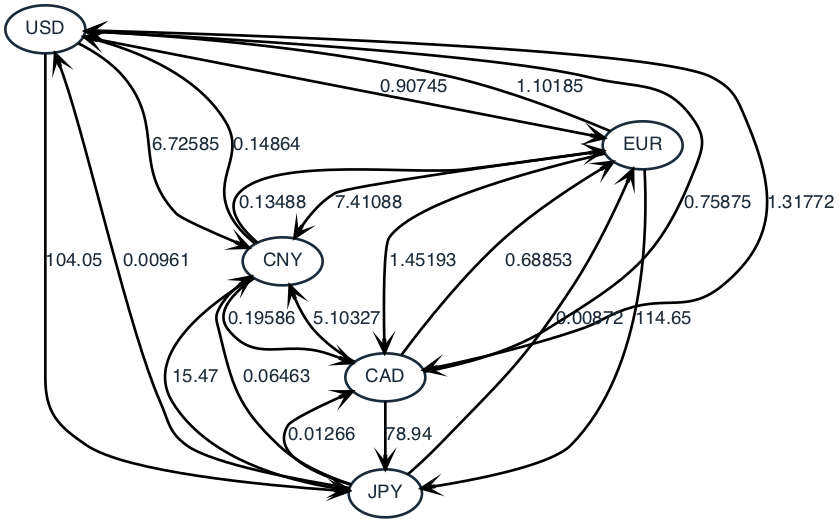

In [39]:
# Draw the graph without specifying a solution, which just draws the graph
draw_solution(G, 'plots/example_graph.png', styles=get_styles())

# Plot the image to screen
display_image('plots/example_graph.png')

In [40]:
def check_for_simple_cycles(G):
    '''
        Check if any simple arbitrage cycles of the type A -> B -> A
        occur. If any are found, print their profit.
        
        Return True if any such simple profitable cycles are found and False if not
    '''

    found_simple_cycles = False

    # For each pair of nodes
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 != node2:
                factor = G[node1][node2]['weight']*G[node2][node1]['weight']
                if factor > 1:
                    print('The trade %s -> %s -> %s nets %.3f%% percent profit!' % (node1, node2, node1, (factor-1)*100))
                    found_simple_cycles = True
    return found_simple_cycles

print('Found simple cycles: %s' % str(check_for_simple_cycles(G)))

Found simple cycles: False


In [41]:
# Must rewite slightly
def create_arbitrage_qubo(G, M1, M2):
    # #
    #     Create a QUBO for finding optimal arbitrage opportunities in a given graph with given penalty constants.
    #     
    #     Arguments:
    #         G: a directed graph (networkx.DiGraph)
    #         M1: first penalty constant (float, positive)
    #         M2: second penalty constant (float, positive)
    #     
    #     Returns:
    #         A list of three polynomials representing the different terms in the problem, the first
    #             is the objective function, the second is the first penalty term, and the third
    #             is the second penalty term (list of QDK QuadraticBinaryPolynomial)
    #         A mapping from logical variable indices to edges on the graph (dict)
    #         A mapping from edges on the graph to logical variable indices (dict)
    #         A mapping from each graph node to the respective incoming nodes (dict)
    #         A mapping from each graph node to the respective outgoing nodes (dict)
    # #

    assert M1 > 0 and M2 > 0, 'The penalty constants M1 and M2 must be positive.'

    # A builder which we will re-use
    #builder = bp.QuadraticBinaryPolynomialBuilder() # -- cannot do. We hope for an equivalent
    builder = dimod.BinaryQuadraticModel()
    

    # Construct the objective function itself, as well as some useful mappings
    index_to_edge = {}
    edge_to_index = {}
    incoming = {}
    outgoing = {}
    for index, (i,j, data) in enumerate(G.edges(data=True)):
        # Update the index/edge mappings
        index_to_edge[index] = (i,j)
        edge_to_index[(i,j)] = index

        # Update the incoming/outgoing mappings
        incoming.setdefault(i,[]).append(j)
        outgoing.setdefault(j,[]).append(i)

        # Add terms to the objective function. We assume that the conversion rates are given
        # by the edge weights.
        conversion_rate = data['weight']
        builder.add_term(numpy.log10(conversion_rate), index, index)

    # Build the objective function
    objective = builder.build_polynomial()

    # The first penalty term
    builder.reset()
    penalty1 = builder.build_polynomial()
    for i in G.nodes():
        # Reset the builder such that the next sum starts from an empty builder
        builder.reset()
        for j in outgoing[i]:
            index = edge_to_index[(i,j)]
            builder.add_term(1, index, index)

        for j in incoming[i]:
            index = edge_to_index[(j,i)]
            builder.add_term(-1, index, index)

        # Square the sum of terms we have so far
        builder.power(2)

        # Build the polynomial for the new terms and add to the terms from before, in penalty1
        term = builder.build_polynomial()
        penalty1.sum(term)

    # Multiply by the penalty constant
    penalty1.multiply_by_factor(-M1)

    # The second penalty term
    builder.reset()
    for i in G.nodes():
        for j in outgoing[i]:
            index = edge_to_index[(i,j)]
            builder.add_term(-1, index, index)

            for jp in outgoing[i]:
                indexp = edge_to_index[(i,jp)]
                builder.add_term(1, index, indexp)

    # Build the second penalty term
    penalty2 = builder.build_polynomial()

    # Multiply by the penalty constant
    penalty2.multiply_by_factor(-M2)

    # Return the polynomials and mappings
    return [objective, penalty1, penalty2], index_to_edge, edge_to_index, incoming, outgoing

In [42]:
# Convert solution to edges (build solution graph)
# calaculate profit
# sum_qubos

def convert_solution_to_edges(solution, index_to_edge):
    '''
        Given a solution (QDK BinarySolution) and an index-to-edge mapping (dict), 
        return the list of edges (list of tuple) that correspond to that solution
    '''

    # Get the binary configuration, which is a dict from variable index
    # to a boolean (True/False)
    configuration = solution.configuration

    # Iterate over the binary configuration, adding edges if the respective 
    # binary variable was set to True
    edges_in_solution = []
    for index, value in configuration.items():
        if value:
            edges_in_solution.append(index_to_edge[index])

    return edges_in_solution

def calculate_profit(G, edges_in_solution):
    '''
        Find the profit (in percent) for a given arbitrage opportunity, represented as a list of 
        edges on a graph. If the result is 5, that means a 5% profit.
    '''

    # Multiply the conversion rates
    factor = 1
    for (u,v) in edges_in_solution:
        factor *= G[u][v]['weight']

    # Convert from 1.05 to 0.05 and then to 5%
    profit = 100*(factor-1)

    return profit

def sum_qubos(qubo_list):
    '''
        Given a list of QuadraticBinaryPolynomials, sum them and return the sum
    '''

    # Create an empty polynomial
    #builder = bp.QuadraticBinaryPolynomialBuilder() -- cannot do
    builder = dimod.BinaryQuadraticModel()
    qubo = builder.build_polynomial()
    # provide different instantiation of qubo

    # Add each of the polynomials
    for element in qubo_list:
        qubo.sum(element)

    return qubo

In [43]:
# Edge checking, check profits - 
# Results
def check_feasible_solution(solution, penalty_terms):
    '''
        Check feasibility of a solution (BinarySolution) vs. a list of penalty terms 
        (QuadraticBinaryPolynomial)
        Raises AssertionError if not feasible
    '''

    # For each penalty term
    for index, penalty_term in enumerate(penalty_terms):
        # Instantiate an evaluator and evaluate the polynomial at the given solution
        # evaluator = bp.QBPEvaluator(penalty_term, solution.configuration)
        # Have to try with different evaluator here
        evaluator = 0 # added zero here, code incolmlete!
        
        # The evaluation should return 0
        assert numpy.isclose(evaluator.value, 0), 'Penalty %i has non-zero value %.2f' % (index, evaluator.value)

def check_feasible_edges(edges_in_solution):
    '''
        Check feasibility of a solution given as a list of edges (tuples of node names)
        Raises AssertionError if not feasible
    '''

    # Build incoming and outgoing dictionaries for edges_in_solution
    incoming = {}
    outgoing = {}
    for i,j in edges_in_solution:
        incoming.setdefault(i,[]).append(j)
        outgoing.setdefault(j,[]).append(i)

    assert sorted(incoming.keys()) == sorted(outgoing.keys())
    for key in incoming.keys():
        assert len(incoming[key]) == len(outgoing[key]), 'At least one node breaks the flow condition: equal incoming and outgoing'
        assert len(incoming[key]) <= 1, 'At least one node has more than one incoming edge %s %s' % (key, incoming[key])
        assert len(outgoing[key]) <= 1, 'At least one node has more than one outgoing edge %s %s' % (key, outgoing[key])

def check_edges_in_graph(edges_in_solution, G):
    '''
        Check if all edges_in_solution are indeed in the graph G
        Raises AssertionError if at least one edge from edges_in_solution is not in the graph G
    '''

    edges = G.edges()
    for edge_in_solution in edges_in_solution:
        assert edge_in_solution in edges, 'Solution edge not in list of edges %s' % edge_in_solution

def check_profitable(edges_in_solution, G):
    '''
        We aren't interested in solutions that don't lead to a profit
        Raises AssertionError if not profitable
    '''

    assert calculate_profit(G, edges_in_solution) > 0


In [44]:
def solve_arbitrage_qubo(G, M1, M2, solver):
    ''' 
        Create the QUBO, solve it, convert the solution to a list of edges, 
        and perform checks on the solution
    '''

    # Create QUBO
    qubo_list, index_to_edge, edge_to_index, incoming, outgoing = create_arbitrage_qubo(G, M1, M2)
    qubo = sum_qubos(qubo_list)

    # We want to maximize, but will be using a minimization method, so we have to multiply the 
    # QUBO by -1, and later multiply the energies by -1 as well
    qubo.multiply_by_factor(-1)

    # Solve
    solutions = solver.minimize(qubo)

    # Iterate over solutions sorted by decreasing energy - maximum energy is maximum profit, so maximum
    # profit will come first. The -1 in the lambda function is necessary due to the conversion back 
    # from a minimization to a maximization problem. The order of sorting is reversed, since the default
    # order is low to high, and we want high to low.
    feasible_solutions = []
    for solution in sorted(solutions, key=lambda x:-x.energy, reverse=True):
        # Convert the solution to a list of edges
        edges_in_solution = convert_solution_to_edges(solution, index_to_edge)

        try:
            # Feasibility/validity checks
            check_feasible_solution(solution, qubo_list[1:])
            check_feasible_edges(edges_in_solution)
            check_edges_in_graph(edges_in_solution, G)
            check_profitable(edges_in_solution, G)

        except AssertionError:
            # Skip solutions that fail the checks
            continue

        # If a solution passed the checks above, we add it to the list of feasible solutions
        feasible_solutions.append(edges_in_solution)

    return feasible_solutions

In [47]:
# We are now ready to search for arbitrage opportunities on the example graph.
# Since this problem is small, we can even employ an exhaustive solver.
# First we define the penalty constants, then we instantiate a solver, solve the problem
# and finally plot the solution on top of the problem graph.
# 1.
# This is the first crucial bit
# Penalty constants
M1 = M2 = 10

# Instantiate a solver
# exhaustive_solver = csi.GrayExhaustiveSolver()
# ==
# I don't have the GrayExhaustiveSolver
# I will use sampler = dimod.ExactSolver() for which I must set up the QUBO
# This is how it looks:-
bqm = dimod.BinaryQuadraticModel({0: 0.0, 1: 1.0}, {(0, 1): 0.5}, -0.5, dimod.SPIN)
response = sampler.sample(bqm)

# Solve the problem
# edges_in_solutions = solve_arbitrage_qubo(G, M1, M2, exhaustive_solver)

sampler = dimod.ExactSolver()
edges_in_solutions = solve_arbitrage_qubo(G, M1, M2, sampler)

# Visualize
styles = get_styles()
visualize(G, edges_in_solutions, styles)
if edges_in_solutions:
    # Plot the best solution to screen
    display_image('plots/solution0.png')


TypeError: __init__() missing 4 required positional arguments: 'linear', 'quadratic', 'offset' and 'vartype'

In [48]:
# Must rewite slightly
def create_arbitrage_qubo1(G, M1, M2):
    '''
        Create a QUBO for finding optimal arbitrage opportunities in a given graph with given penalty constants.
        
        Arguments:
            G: a directed graph (networkx.DiGraph)
            M1: first penalty constant (float, positive)
            M2: second penalty constant (float, positive)
        
        Returns:
            A list of three polynomials representing the different terms in the problem, the first
                is the objective function, the second is the first penalty term, and the third
                is the second penalty term (list of QDK QuadraticBinaryPolynomial)
            A mapping from logical variable indices to edges on the graph (dict)
            A mapping from edges on the graph to logical variable indices (dict)
            A mapping from each graph node to the respective incoming nodes (dict)
            A mapping from each graph node to the respective outgoing nodes (dict)
    '''

    assert M1 > 0 and M2 > 0, 'The penalty constants M1 and M2 must be positive.'

    # A builder which we will re-use
    # builder = bp.QuadraticBinaryPolynomialBuilder() # -- cannot do. We hope for an equivalent
    builder = dimod.BinaryQuadraticModel()

    

    # Construct the objective function itself, as well as some useful mappings
    index_to_edge = {}
    edge_to_index = {}
    incoming = {}
    outgoing = {}
    for index, (i,j, data) in enumerate(G.edges(data=True)):
        # Update the index/edge mappings
        index_to_edge[index] = (i,j)
        edge_to_index[(i,j)] = index

        # Update the incoming/outgoing mappings
        incoming.setdefault(i,[]).append(j)
        outgoing.setdefault(j,[]).append(i)

        # Add terms to the objective function. We assume that the conversion rates are given
        # by the edge weights.
        conversion_rate = data['weight']
        builder.add_term(numpy.log10(conversion_rate), index, index)

    # Build the objective function
    objective = builder.build_polynomial()

    # The first penalty term
    builder.reset()
    penalty1 = builder.build_polynomial()
    for i in G.nodes():
        # Reset the builder such that the next sum starts from an empty builder
        builder.reset()
        for j in outgoing[i]:
            index = edge_to_index[(i,j)]
            builder.add_term(1, index, index)

        for j in incoming[i]:
            index = edge_to_index[(j,i)]
            builder.add_term(-1, index, index)

        # Square the sum of terms we have so far
        builder.power(2)

        # Build the polynomial for the new terms and add to the terms from before, in penalty1
        term = builder.build_polynomial()
        penalty1.sum(term)

    # Multiply by the penalty constant
    penalty1.multiply_by_factor(-M1)

    # The second penalty term
    builder.reset()
    for i in G.nodes():
        for j in outgoing[i]:
            index = edge_to_index[(i,j)]
            builder.add_term(-1, index, index)

            for jp in outgoing[i]:
                indexp = edge_to_index[(i,jp)]
                builder.add_term(1, index, indexp)

    # Build the second penalty term
    penalty2 = builder.build_polynomial()

    # Multiply by the penalty constant
    penalty2.multiply_by_factor(-M2)

    # Return the polynomials and mappings
    return [objective, penalty1, penalty2], index_to_edge, edge_to_index, incoming, outgoing

In [49]:
# Must rewite slightly
def create_arbitrage_qubo1(G, M1, M2):
    '''
        Create a QUBO for finding optimal arbitrage opportunities in a given graph with given penalty constants.
        
        Arguments:
            G: a directed graph (networkx.DiGraph)
            M1: first penalty constant (float, positive)
            M2: second penalty constant (float, positive)
        
        Returns:
            A list of three polynomials representing the different terms in the problem, the first
                is the objective function, the second is the first penalty term, and the third
                is the second penalty term (list of QDK QuadraticBinaryPolynomial)
            A mapping from logical variable indices to edges on the graph (dict)
            A mapping from edges on the graph to logical variable indices (dict)
            A mapping from each graph node to the respective incoming nodes (dict)
            A mapping from each graph node to the respective outgoing nodes (dict)
    '''

    assert M1 > 0 and M2 > 0, 'The penalty constants M1 and M2 must be positive.'

    # A builder which we will re-use
    # builder = bp.QuadraticBinaryPolynomialBuilder() -- cannot do. We hope for an equivalent
    # builder = dimod.BinaryQuadraticModel()

    # form:- dimod.BinaryQuadraticModel(linear (dict[variable, bias]), quadratic (dict[(variable, variable), bias])
    # offset (number), vartype (Vartype/str/set), **kwargs)
    # bqm = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'c': 0.5},
    # {('a', 'b'): -1.0, ('b', 'c'): 1.5}, 1.4, dimod.SPIN)
    # bqm = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'variable': bias},{('a', 'b'): -1.0,
    # (variable, variable): bias}, 0.0, dimod.SPIN)

    # Construct the objective function itself, as well as some useful mappings
    index_to_edge = {}
    edge_to_index = {}
    incoming = {}
    outgoing = {}
    bqm = dimod.BinaryQuadraticModel({}, {}, 0.0, dimod.SPIN)
    for index, (i,j, data) in enumerate(G.edges(data=True)):
        # Update the index/edge mappings
        index_to_edge[index] = (i,j)
        edge_to_index[(i,j)] = index

        # Update the incoming/outgoing mappings
        incoming.setdefault(i,[]).append(j)
        outgoing.setdefault(j,[]).append(i)

        # Add terms to the objective function. We assume that the conversion rates are given
        # by the edge weights.
        conversion_rate = data['weight']
        # print(numpy.log10(conversion_rate), index, index)
        bqm.add_variables_from({index: numpy.log10(conversion_rate)}) # OK?
        bqm.add_variables_from({(index, index): numpy.log10(conversion_rate)})# OK?
        #bqm.update(bqm.add_variables_from({index: numpy.log10(conversion_rate)},{(index, index): numpy.log10(conversion_rate)}), dimod.SPIN) # KO
        #bqm.quadratic.update([index, index,numpy.log10(conversion_rate)])
    print(bqm)

In [50]:
M1 = M2 = 10
create_arbitrage_qubo1(G, M1, M2)

BinaryQuadraticModel({0: -0.04217729502167787, (0, 0): -0.04217729502167787, 1: 2.0172420845476458, (1, 1): 2.0172420845476458, 2: 0.11982313759216133, (2, 2): 0.11982313759216133, 3: 0.82774717744506, (3, 3): 0.82774717744506, 4: 0.04212247599827541, (4, 4): 0.04212247599827541, 5: 2.0593740590659575, (5, 5): 2.0593740590659575, 6: 0.16194567879757768, (6, 6): 0.16194567879757768, 7: 0.8698697810498238, (7, 7): 0.8698697810498238, 8: -2.0172766123314547, (8, 8): -2.0172766123314547, 9: -2.059483515067433, (9, 9): -2.059483515067433, 10: -1.8975662943186637, (10, 10): -1.8975662943186637, 11: -1.1895658440773271, (11, 11): -1.1895658440773271, 12: -0.11990129591668598, (12, 12): -0.11990129591668598, 13: -0.16207713231248566, (13, 13): -0.16207713231248566, 14: 1.8972971220594965, (14, 14): 1.8972971220594965, 15: 0.707848546268371, (15, 15): 0.707848546268371, 16: -0.8278643033504335, (16, 16): -0.8278643033504335, 17: -0.8700524427193329, (17, 17): -0.8700524427193329, 18: 1.18949031

In [51]:
# Must rewite slightly
def create_arbitrage_qubo1(G, M1, M2):
    '''
        Create a QUBO for finding optimal arbitrage opportunities in a given graph with given penalty constants.
        
        Arguments:
            G: a directed graph (networkx.DiGraph)
            M1: first penalty constant (float, positive)
            M2: second penalty constant (float, positive)
        
        Returns:
            A list of three polynomials representing the different terms in the problem, the first
                is the objective function, the second is the first penalty term, and the third
                is the second penalty term (list of QDK QuadraticBinaryPolynomial)
            A mapping from logical variable indices to edges on the graph (dict)
            A mapping from edges on the graph to logical variable indices (dict)
            A mapping from each graph node to the respective incoming nodes (dict)
            A mapping from each graph node to the respective outgoing nodes (dict)
    '''

    assert M1 > 0 and M2 > 0, 'The penalty constants M1 and M2 must be positive.'

    # A builder which we will re-use
    # builder = bp.QuadraticBinaryPolynomialBuilder() -- cannot do. We hope for an equivalent
    # builder = dimod.BinaryQuadraticModel()

    # form:- dimod.BinaryQuadraticModel(linear (dict[variable, bias]), quadratic (dict[(variable, variable), bias])
    # offset (number), vartype (Vartype/str/set), **kwargs)
    # bqm = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'c': 0.5},
    # {('a', 'b'): -1.0, ('b', 'c'): 1.5}, 1.4, dimod.SPIN)
    # bqm = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'variable': bias},{('a', 'b'): -1.0,
    # (variable, variable): bias}, 0.0, dimod.SPIN)

    # Construct the objective function itself, as well as some useful mappings
    index_to_edge = {}
    edge_to_index = {}
    incoming = {}
    outgoing = {}
    bqm = dimod.BinaryQuadraticModel({}, {}, 0.0, dimod.SPIN)
    for index, (i,j, data) in enumerate(G.edges(data=True)):
        # Update the index/edge mappings
        index_to_edge[index] = (i,j)
        edge_to_index[(i,j)] = index

        # Update the incoming/outgoing mappings
        incoming.setdefault(i,[]).append(j)
        outgoing.setdefault(j,[]).append(i)

        # Add terms to the objective function. We assume that the conversion rates are given
        # by the edge weights.
        conversion_rate = data['weight']
        
        # builder.add_term(numpy.log10(conversion_rate), index, index) <-- from 1.

        bqm.add_variables_from({index: numpy.log10(conversion_rate)}) # OK?
        bqm.add_variables_from({(index, index): numpy.log10(conversion_rate)})# OK?

    print(bqm)
    
    # Build the objective function
    # objective = builder.build_polynomial() <-- from 2.
    # I assume that the objective is the populated QUBO
    # I also assume that the builder function is a helper function.
    # Looking at the API we have:- 
# ============================
    # The first penalty term
    # builder.reset()
    # penalty1 = builder.build_polynomial()
    # for i in G.nodes():
    #     # Reset the builder such that the next sum starts from an empty builder
    #     builder.reset()
    #     for j in outgoing[i]:
    #         index = edge_to_index[(i,j)]
    #         builder.add_term(1, index, index)
    # 
    #     for j in incoming[i]:
    #         index = edge_to_index[(j,i)]
    #         builder.add_term(-1, index, index)
    # 
    #     # Square the sum of terms we have so far
    #     builder.power(2)
    # 
    #     # Build the polynomial for the new terms and add to the terms from before, in penalty1
    #     term = builder.build_polynomial()
    #     penalty1.sum(term)
    # 
    # # Multiply by the penalty constant
    # penalty1.multiply_by_factor(-M1)
    # 
    # # The second penalty term
    # builder.reset()
    # for i in G.nodes():
    #     for j in outgoing[i]:
    #         index = edge_to_index[(i,j)]
    #         builder.add_term(-1, index, index)
    # 
    #         for jp in outgoing[i]:
    #             indexp = edge_to_index[(i,jp)]
    #             builder.add_term(1, index, indexp)
    # 
    # # Build the second penalty term
    # penalty2 = builder.build_polynomial()
    # 
    # # Multiply by the penalty constant
    # penalty2.multiply_by_factor(-M2)
    # 
    # # Return the polynomials and mappings
    # return [objective, penalty1, penalty2], index_to_edge, edge_to_index, incoming, outgoing

In [52]:
bqm.add_variables_from({'a': .5, 'b': -1.})
'b' in bqm
#True

True

In [53]:
bqm.add_variables_from({'b': -1., 'c': 2.0})
bqm.linear['b']
# -2.0

-2.0

In [55]:
bqm.to_pandas_dataframe()

,0,1,a,b,c
0,-1.0,2.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
a,0.0,0.0,1.0,0.0,0.0
b,0.0,0.0,0.0,-4.0,0.0
c,0.0,0.0,0.0,0.0,4.0


In [56]:
bqm.add_variables_from({0: -0.04217729502167787, 0:-0.04217729502167787})

In [ ]:
# Try and replicat this behaviour
# from qdk.binary_polynomial import QuadraticBinaryPolynomialBuilder
# 
# # Create a QUBO builder
# builder = QuadraticBinaryPolynomialBuilder()
# # 
# # 
# # # Add terms to the buffer
# builder.add_term(1.0, 0, 0)
# builder.add_term(2.0, 0, 2)
# builder.add_term(3.0, 1, 3)
# builder.add_constant_term(-5.0)
# # 
# # # Build the polynomial
# quad_poly = builder.build_polynomial()
# 
# bqm.add_variables_from({index: numpy.log10(conversion_rate)})
# bqm.add_variables_from({(index, index): numpy.log10(conversion_rate)})

bqm = dimod.BinaryQuadraticModel({'a': 0.0, 'b': -1.0, 'c': 0.5},
    {('a', 'b'): -1.0, ('b', 'c'): 1.5}, 1.4, dimod.SPIN)

constant_term = -5.0

# Q = {(0, 0): -1, (1, 1): -1, (0, 1): 2}

Q = {(0, 0): 1.0, (0, 2): 2.0, (1, 3): 3.0}

bqm = dimod.BinaryQuadraticModel.from_qubo(Q,constant_term)

# Try to build the QUBO first

bqm.from_qubo()

# Print the polynomial: - 5 + x0 + 2 x0 x2 + 3 x1 x3
# print quad_poly
print(bqm)
bqm = bqm.to_qubo()
print(bqm)

# Print constant term
# print quad_poly.constant_term
print(bqm.constant_term) # -- KO

# Alternatively you can access the constant term using the 0th index
# if it is non-zero, if it is zero this will return the first non-zero term
# print quad_poly[0]
print(bqm.to_json())

print(bqm.linear)
print(bqm.quadratic)
print(bqm.quadratic[(1, 3)])
print(bqm.offset)
print(bqm.vartype)
for k, v in bqm.quadratic:
    print(str(k) +" : "+ str(v))
ising = bqm.to_ising()
print(ising)
print(ising[1][(1, 3)])

# Get the second term of the polynomial
term = quad_poly[1]
print(bqm[0])

# Print the coefficient of the x1 x3 term
print (quad_poly.get_coefficient(1, 3))

print()

# Print the Ising coefficient of the  x1 x3 term
print(quad_poly.get_ising_coefficient(1, 3))

In [ ]:
#In Error
import random
import itertools

import networkx as nx

from dwave_qbsolv import QBSolv
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import FixedEmbeddingComposite
import minorminer

# define (sub)problem size
solver_limit = 3
qubo_size = 4

# find embedding of subproblem-sized complete graph to the QPU
G = nx.complete_graph(solver_limit)
system = DWaveSampler()
embedding = minorminer.find_embedding(G.edges, system.edgelist)

# solve a random problem
Q = {t: random.uniform(-1, 1) for t in itertools.product(range(qubo_size), repeat=2)}
response = QBSolv().sample_qubo(Q, solver=FixedEmbeddingComposite(system, embedding), solver_limit=solver_limit)
print("Q=" + str(Q))
print("samples=" + str(list(response.samples())))
print("energies=" + str(list(response.data_vectors['energy'])))

In [ ]:

from dwave_qbsolv import QBSolv
Q = {(0, 0): 1, (1, 1): 1, (0, 1): 1}
response = QBSolv().sample_qubo(Q)
print("samples=" + str(list(response.samples())))
print("energies=" + str(list(response.data_vectors['energy'])))

In [ ]:
# In Error
import random
from dwave.cloud import Client

# Connect using the default or environment connection information
with Client.from_config() as client:

    # Load the default solver
    solver = client.get_solver()

    # Build a random Ising model to exactly fit the graph the solver supports
    linear = {index: random.choice([-1, 1]) for index in solver.nodes}
    quad = {key: random.choice([-1, 1]) for key in solver.undirected_edges}

    # Send the problem for sampling, include solver-specific parameter 'num_reads'
    computation = solver.sample_ising(linear, quad, num_reads=100)

    # Print the first sample out of a hundred
    print(computation.samples[0])

In [ ]:
bqm01 = dimod.BinaryQuadraticModel({0: -1, 1: -1}, {(0, 1): 2}, 0.0, dimod.BINARY)
print(bqm01.to_json())
bqm01 = bqm01.to_qubo()
print(bqm01)

In [ ]:
import dimod
bqm02 = dimod.BinaryQuadraticModel({}, {}, 0.0, dimod.BINARY)
# bqm02.add_variables_from({0: -1, 1: -1})#linear
bqm02.add_variables_from({(0, 1): 2})#quadratic
print(bqm02.to_json())

In [ ]:
import dimod
bqm03 = dimod.BinaryQuadraticModel({}, {}, 0.0, dimod.BINARY)
# bqm02.add_variables_from({0: -1, 1: -1})#linear
# canonical form
# model = dimod.BinaryQuadraticModel.from_qubo(Q, offset = 0.0)
# NOTE:- no need to create instance before
# Seems the way to create model above
Q = {(0, 0): -1, (1, 1): -1, (0, 1): 2}
model = bqm03.from_qubo(Q)
print(model)
print(model.to_json())
print(model.linear)
print(model.quadratic)
print(model.vartype)